In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, HoverTool
from mpl_toolkits.mplot3d import Axes3D

In [9]:
df=pd.read_hdf('model/fasttext/df.h5', 'table')

In [10]:
df_nap=df[df['From']=='nap']

In [9]:
df_nap.sample(5)

,product_id,designer_original_name,product_name,comb_desc,From,style,tf_ft_desc_embedding
963075,5b01408c4500d65c4d2fd75b,Paul & Joe,Lace-trimmed cotton-voile blouse,lacetrimm cottonvoile blouse fit true size nor...,nap,None,"[0.0044748136, 0.0027660823, -0.0001821472, -0..."
960776,5b013fb84500d65c4d2fc282,Cefinn,Voile wrap top,voile wrap wraparound design tie waist adjusta...,nap,None,"[0.003690735, 0.002320322, -0.00031777995, -0...."
961668,5b01404c4500d65c4d2fd0e3,Marc Jacobs,Duchesse-satin skirt,duchessesatin skirt kneelength design wear wai...,nap,None,"[0.0032961615, 0.0038483758, -0.00023306375, -..."
961731,5b01404f4500d65c4d2fd131,Michael Kors Collection,Ribbed stretch-knit pencil skirt,rib stretchknit pencil skirt midilength design...,nap,None,"[0.0034457527, 0.002914359, -0.0009967057, -0...."
960362,5b013fa74500d65c4d2fc0be,Koché,Striped satin track pants,strip satin track pant pant measure high rise ...,nap,None,"[0.00555829, 0.0041529085, 0.00065291906, -0.0..."


In [11]:
x=np.vstack(df_nap['tf_ft_desc_embedding'])
x.shape

(9627, 50)

In [16]:
db = DBSCAN(eps=0.05, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


In [17]:
k=10
km = KMeans(n_clusters=k, n_init=20).fit(x)
colors=km.labels_

t-SNE: 88.34 sec
t-SNE: 90.77 sec
t-SNE: 152.09 sec
t-SNE: 194.94 sec
t-SNE: 302.89 sec


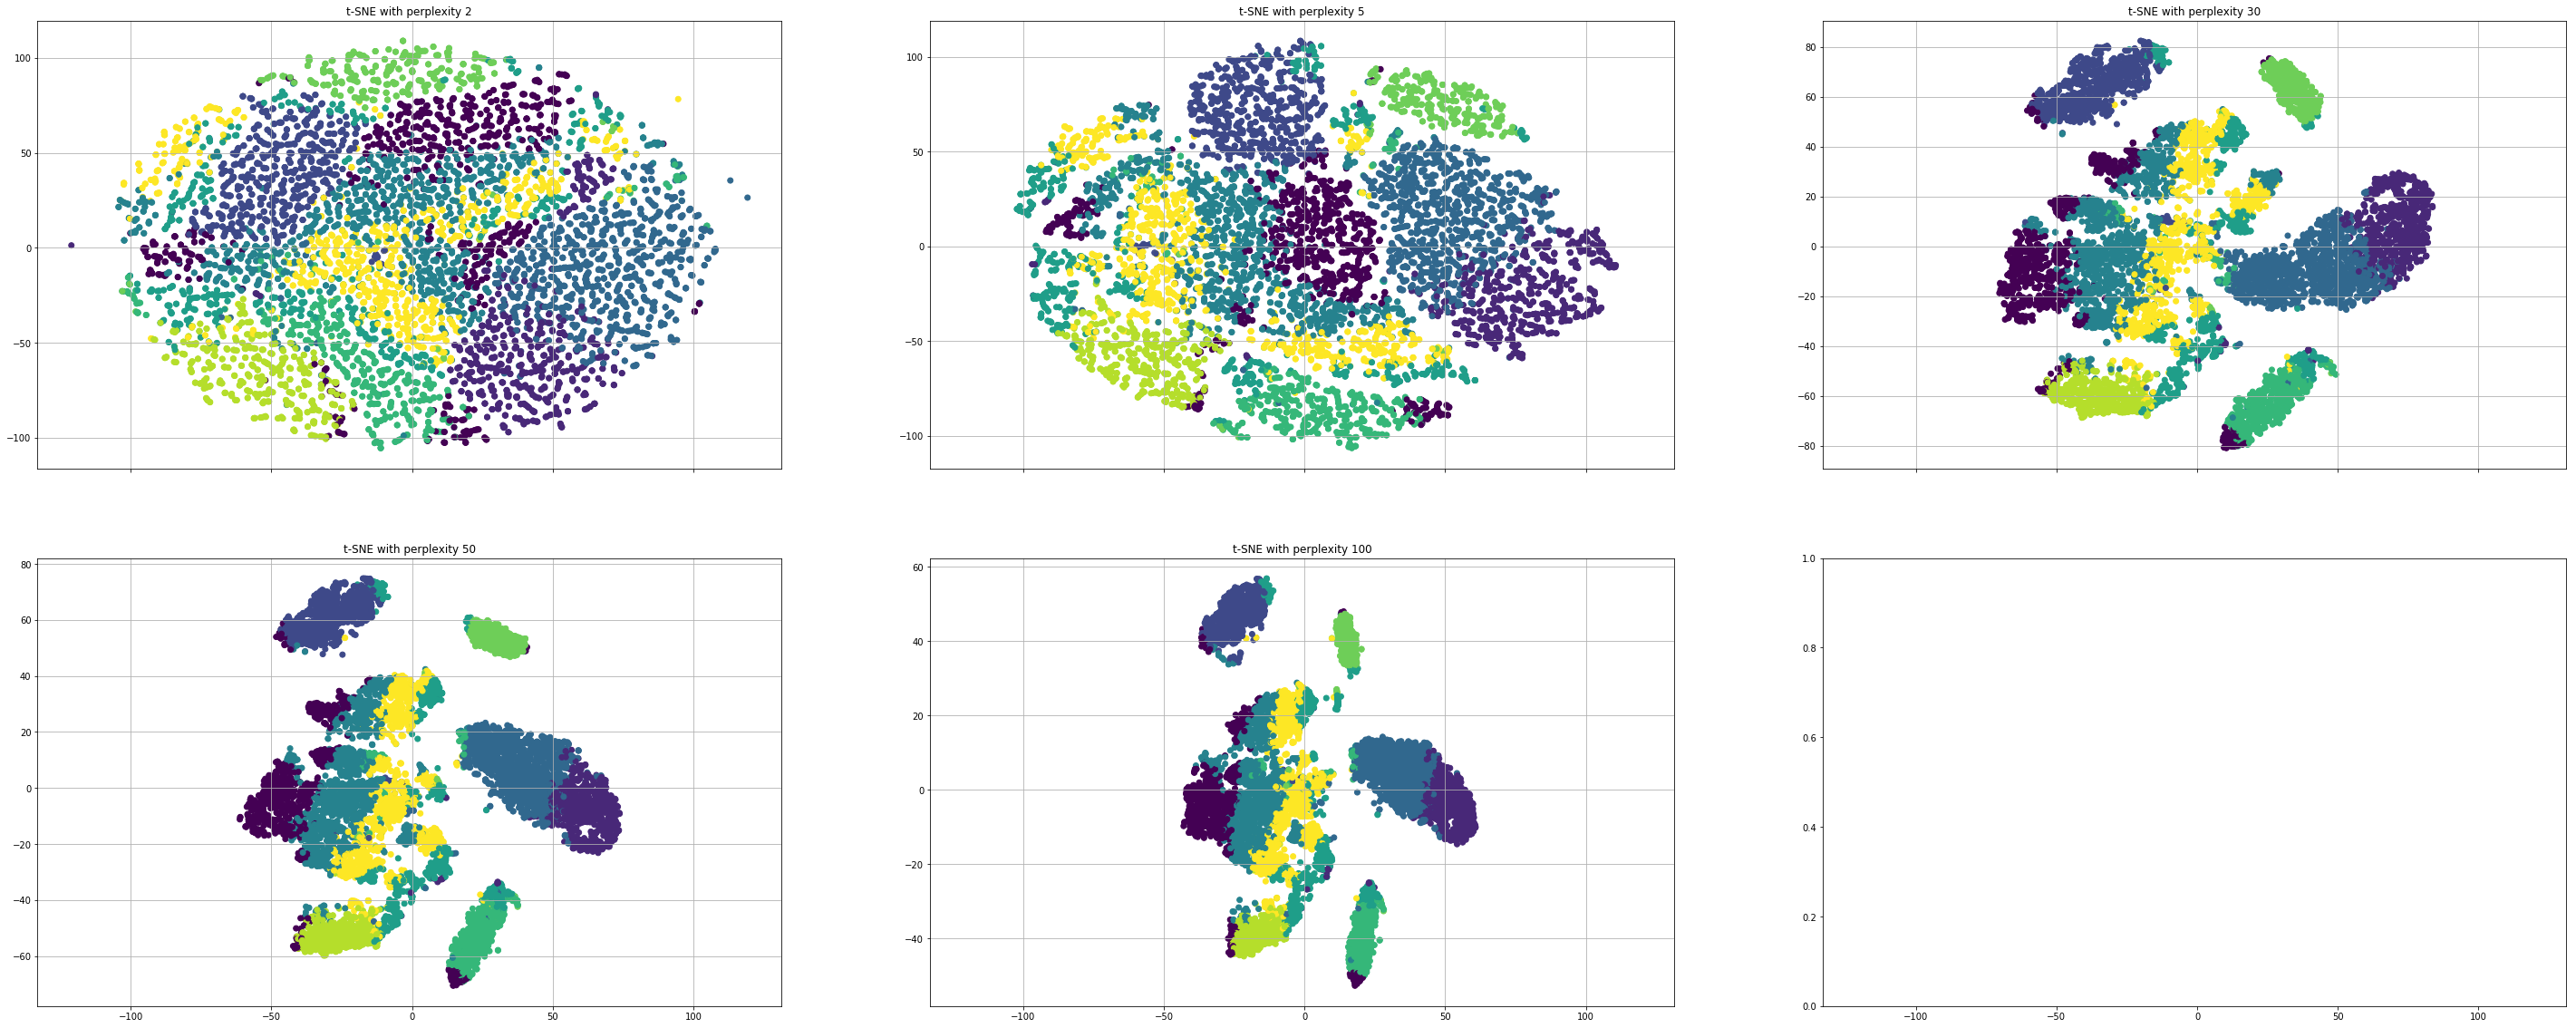

In [22]:
n_iter = 1000
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(50,20))
titles = ['t-SNE with perplexity 2', 't-SNE with perplexity 5', 't-SNE with perplexity 30', 't-SNE with perplexity 50', 't-SNE with perplexity 100']

for ax, title, i in zip(axes.flat, titles, [2,5,30,50,100]):    
    t0 = time()
    model = TSNE(n_components=2, n_iter = n_iter, random_state=0, perplexity =i)
    Y = model.fit_transform(x)
    t1 =time()
    print( "t-SNE: %.2f sec" % (t1 -t0))
    ax.scatter(Y[:, 0], Y[:, 1], c=colors)
    ax.set_title(title)
    ax.grid(True)   
plt.show()

In [72]:
%%time
x=np.vstack(df_nap['tf_ft_desc_embedding'])
x.shape
model1 = TSNE(n_components=3, n_iter = n_iter, random_state=0, perplexity = 50)
Y1 = model1.fit_transform(x)

CPU times: user 9min 24s, sys: 12.2 s, total: 9min 36s
Wall time: 9min 36s


In [66]:
Y1.shape

(9627, 3)

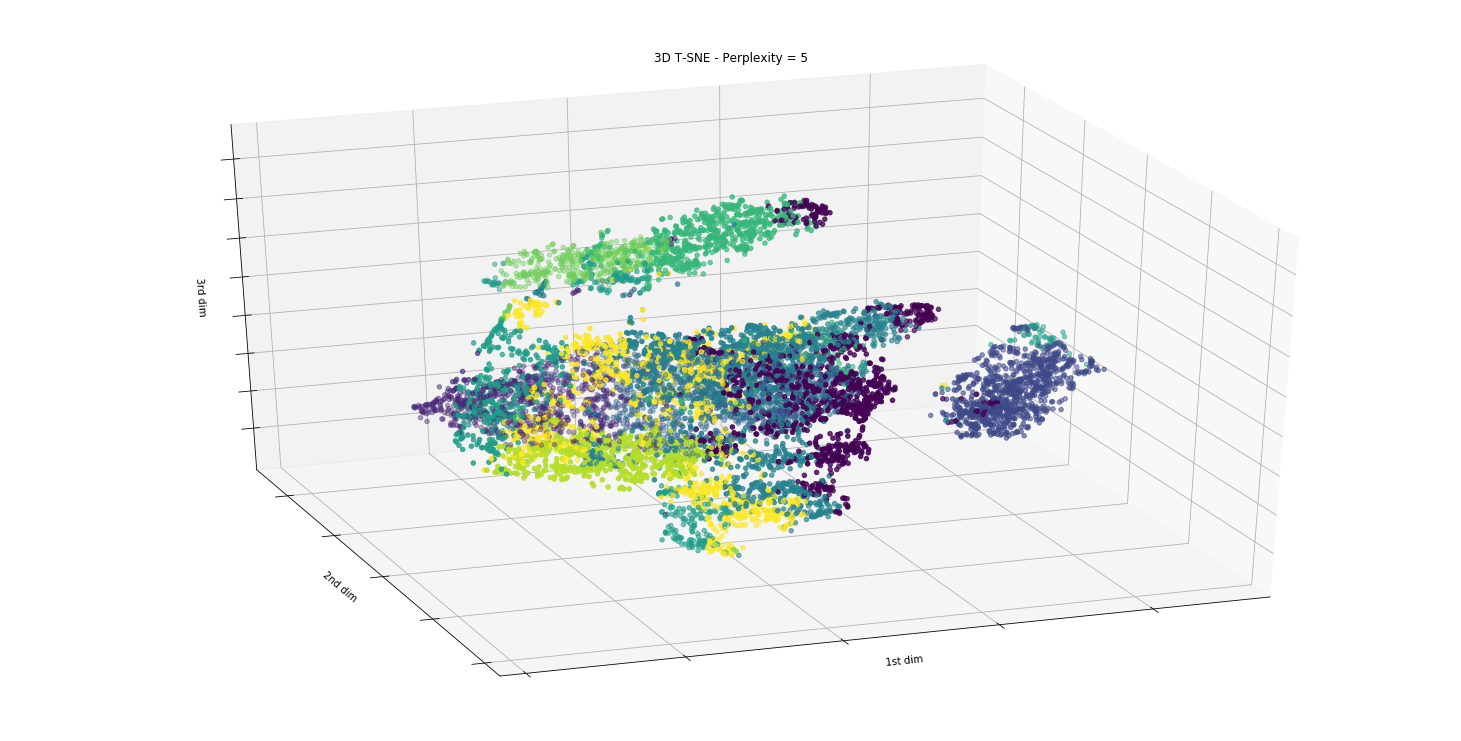

In [89]:
fig = plt.figure(1, figsize=(20, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Y1[:, 0], Y1[:, 1], Y1[:, 2], c= colors)
           #cmap=plt.cm.Paired)
ax.set_title("3D T-SNE - Perplexity = {}".format(5))
ax.set_xlabel("1st dim")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd dim")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd dim")
ax.w_zaxis.set_ticklabels([])
plt.show()

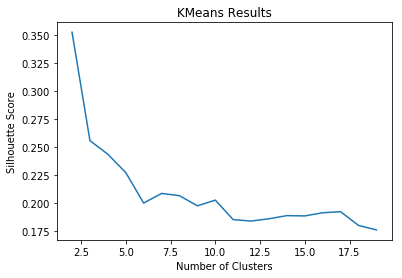

In [14]:
#Range for k
kmin = 2
kmax = 20
sil_scores = []

#Compute silouhette scoeres
for k in range(kmin,kmax):
    km = KMeans(n_clusters=k, n_init=20).fit(x)
    sil_scores.append(silhouette_score(x, km.labels_))
    
#Plot
plt.plot(range(kmin,kmax), sil_scores)
plt.title('KMeans Results')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [97]:
cluster_map = df_nap
cluster_map['cluster'] = km.labels_
cluster_map.head()

/home/ubuntu/.virtualenvs/hana/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,product_id,designer_original_name,product_name,comb_desc,From,style,tf_ft_desc_embedding,cluster
955818,5b013e8c4500d65c4d2fa40d,Burberry,Pintucked polka-dot silk midi skirt,pintucked polkadot silk midi skirt midilength ...,nap,classic,"[0.003036608, 0.0035108787, 0.00073204795, -0....",6
955819,5b013e8c4500d65c4d2fa410,The Row,Haylen hooded shell coat,haylen hood shell coat cut loose fit sized lay...,nap,None,"[0.0031637968, 0.0026509725, -0.0010945441, -0...",0
955820,5b013e8c4500d65c4d2fa411,Alaïa,Fine-knit wool bodysuit,fineknit wool bodysuit design close fit slight...,nap,None,"[0.0048617213, 0.0038800626, -0.002506889, -0....",5
955821,5b013e8c4500d65c4d2fa412,Simone Rocha,Mesh-paneled ruffled washed silk-satin dress,meshpaneled ruffled washed silksatin dress des...,nap,None,"[0.0025773828, 0.0035503092, -0.000460625, -0....",3
955822,5b013e8c4500d65c4d2fa413,Ann Demeulemeester,Ribbed stretch-jersey tank,rib stretchjersey tank design close fit partic...,nap,None,"[0.004313028, 0.0033918552, -0.0015635215, -0....",9


In [1]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above
allDone()